In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
haberman = pd.read_csv('Haberman.csv', header = None)

In [3]:
haberman.columns = ['Age', 'Op_Year', 'aux_nodes', 'Surv_Status']

In [4]:
haberman.head()

,Age,Op_Year,aux_nodes,Surv_Status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


### OBJECTIVE:
    This is a classification model where the class label is Surv_Status
    The main objective is to perform EDA to identify which features are important and to understand the relationship between the features
    
### Column Descriptions:
    Age: Patients age at the time of operation.
    Op_Year: Year of Operation.
    aux_nodes: Number of auxiliary nodes detected as positive
    SurvStaus: 1 - Patient survied more than 5 yrs
               2 - Patient died within 5 yrs

In [5]:
haberman.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Age          306 non-null    int64
 1   Op_Year      306 non-null    int64
 2   aux_nodes    306 non-null    int64
 3   Surv_Status  306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


Observations:
1. There are no missing values in the data.
2. All the 4 Features are numerical

In [6]:
haberman.describe()

,Age,Op_Year,aux_nodes,Surv_Status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


Observations:
1. Total Number of Records - 306
2. The patients age is in between (30, 83)
3. From Op_Year, it is clear that data contains from 1958 to 1969.
4. 50% of the Patients survied more than 5yrs after operation

In [7]:
haberman['Surv_Status'].value_counts()

1    225
2     81
Name: Surv_Status, dtype: int64

Observations:
1. This is an unbalanced dataset.
2. 225 Patients survied more than 5 yrs and 81 Patients died within 5yrs of Operation

## Univariate Analysis

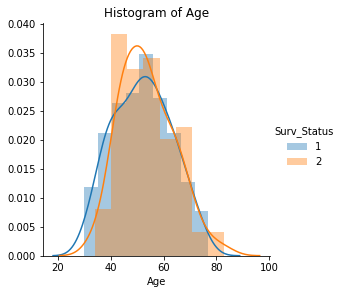

In [8]:
sns.FacetGrid(haberman, hue = 'Surv_Status', size = 4)\
.map(sns.distplot, "Age")\
.add_legend()
plt.title("Histogram of Age")
plt.show()

Observations:
    1. All the Patients with Age > 75 are survied less than 5 yrs after the operation.
    2. Patients with Age < 35 are survived more than 5 yrs after the operation.

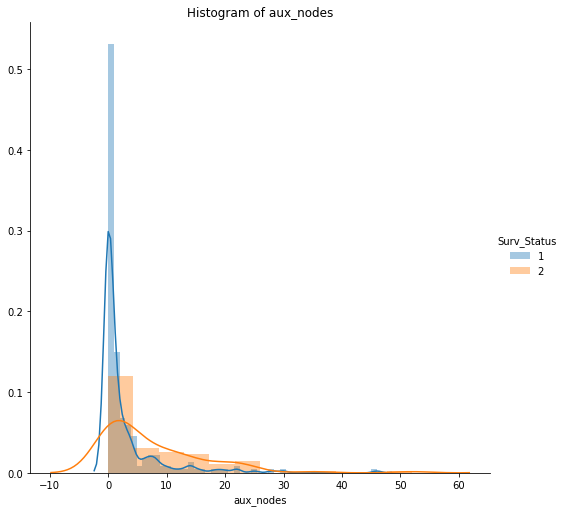

In [9]:
sns.FacetGrid(haberman, hue = 'Surv_Status', size = 7)\
.map(sns.distplot, "aux_nodes")\
.add_legend()

plt.title('Histogram of aux_nodes')
plt.show()

Observations:
    1. Patients with aux_nodes 0 have good changes of survivial for more than 5 yrs
    2. As the nodes increases the number of patients decreases
    3. Very less number of patients have 10 or more nodes

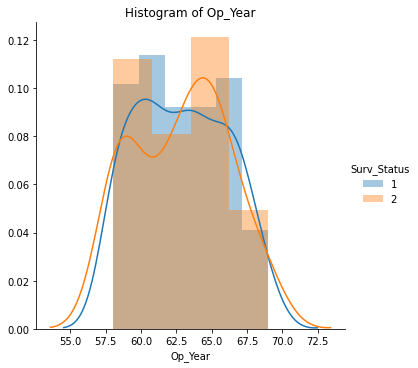

In [10]:
sns.FacetGrid(haberman, hue = 'Surv_Status', size = 5)\
.map(sns.distplot, "Op_Year")\
.add_legend()

plt.title('Histogram of Op_Year')
plt.show()

Observations:
1. Most of the Patients who had their operations in between 1963 - 1966, have not survived.

In [11]:
surv_1 = haberman.loc[(haberman['Surv_Status'] == 1)]
surv_2 = haberman.loc[(haberman['Surv_Status'] == 2)]

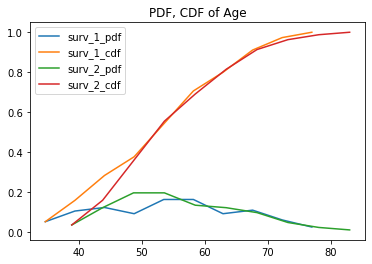

In [12]:
counts, bin_edges = np.histogram(surv_1['Age'], bins = 10, density = True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)

counts, bin_edges = np.histogram(surv_2['Age'], bins = 10, density = True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)

plt.legend(['surv_1_pdf', 'surv_1_cdf', 'surv_2_pdf', 'surv_2_cdf'])
plt.title('PDF, CDF of Age')
plt.show()

Observation:
All the people who have survived after surgery are below 75 years

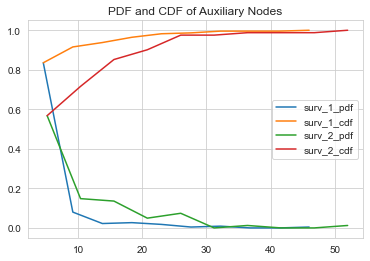

In [13]:
sns.set_style("whitegrid");
counts, bin_edges = np.histogram(surv_1['aux_nodes'], bins = 10, density = True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)

counts, bin_edges = np.histogram(surv_2['aux_nodes'], bins = 10, density = True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)

plt.legend(['surv_1_pdf', 'surv_1_cdf', 'surv_2_pdf', 'surv_2_cdf'])
plt.title('PDF and CDF of Auxiliary Nodes')
plt.show()

Observations:
1. 80% of the patients who survived more than 5yrs have 0 aux nodes
2. 100% of the patients who have auxiliary nodes greater than 45 are not survved more than 5 yrs.

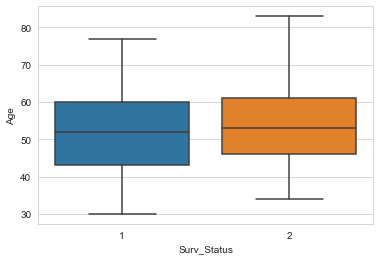

In [14]:
sns.boxplot(x = 'Surv_Status', y = 'Age', data = haberman)
plt.show()

Observations:
    For Surv_Status 1, out of 225 Patients:
        1. 25% of Patients have age < 44Yrs
        2. 50% of the Patients have the Age < 52 yrs
        3. 75% of the patients have the Age < 60Yrs
    For Surv_Status 2, out od 81 Patients:
        1. 25% of Patients have age < 46yrs
        2. 50% of the Patients have the age < 54 yrs
        3. 75% of the Patients have the age < 62 yrs

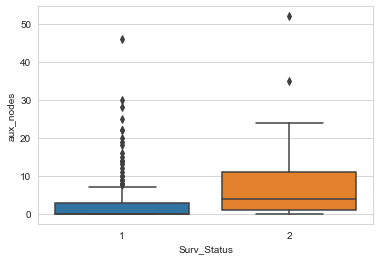

In [15]:
sns.boxplot(x = 'Surv_Status', y = 'aux_nodes', data = haberman)
plt.show()

Observation:
    1. Aux nodes have outliers
    2. In the data the patients who surved more than 5yrs have more outliers/abnormaties/Anomalies
    3. For Surv_Status 1, out of 225 Patients:
        i. 75% of the Patients have less than 3 nodes
       For Surv_Status 2, out of 81 Patients:
        i. 25% of the Patients have aux nodes < 2 nodes
        ii. 50% of the patients have aux nodes <= 4 nodes
        iii. 75% of the patients have the aux nodes < 12 nodes
    

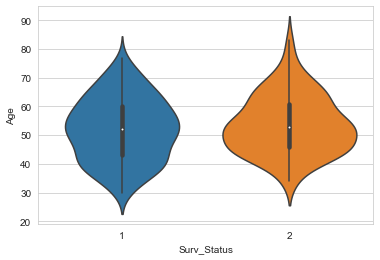

In [16]:
sns.violinplot(x = 'Surv_Status', y = 'Age', data = haberman)
plt.show()

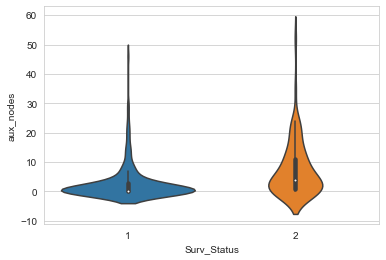

In [17]:
sns.violinplot(x = 'Surv_Status', y = 'aux_nodes', data = haberman)
plt.show()

### Bi-Variate Analysis

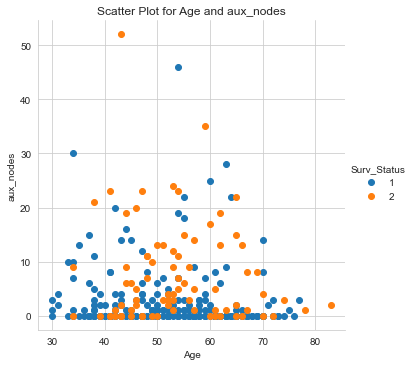

In [18]:
sns.FacetGrid(haberman, hue = "Surv_Status", size = 5)\
.map(plt.scatter, 'Age', 'aux_nodes')\
.add_legend()
plt.title('Scatter Plot for Age and aux_nodes')
plt.show()

Observations:
    1. From the above scatter plot it is difficult to separate/classify the Surv_Staus

Text(0.5, 1.0, 'pair-plots')

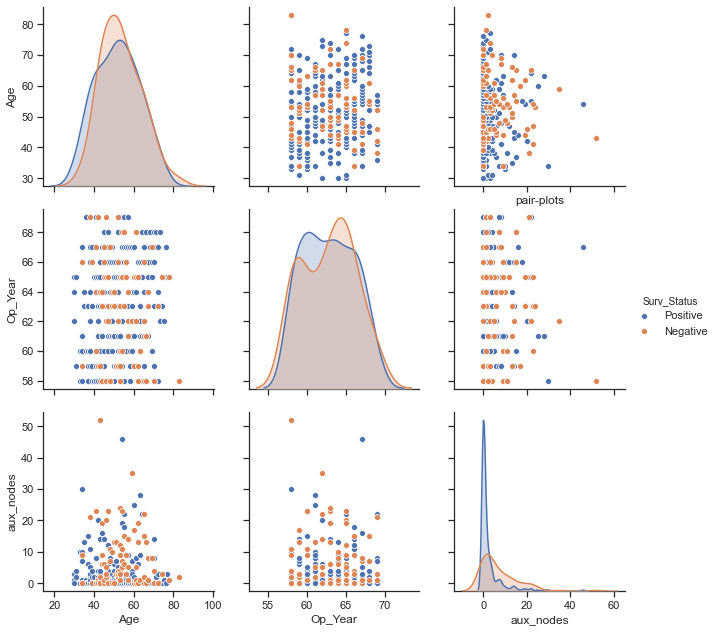

In [19]:
haberman['Surv_Status'] = haberman['Surv_Status'].apply(lambda x: 'Positive' if x == 1 else 'Negative')
sns.set_style("whitegrid");
sns.set(style="ticks",color_codes=True)
sns.pairplot(haberman,hue="Surv_Status",height=3)
plt.title('pair-plots')

Observations:
    Features are difficult to separate, because the datapoints are so scattered

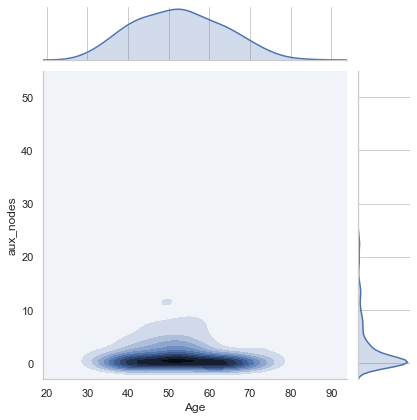

In [20]:
sns.set_style('whitegrid')
sns.jointplot(x = 'Age', y = 'aux_nodes', data = haberman, kind = 'kde')
plt.show()

Observations:

The data contains the patients treatment history from 1959 to 1969.
The objective is to classify the model to predict whether the patient survive more than 5 yrs or not based on 3 Features:
1. Age of the patient at the time of Operation
2. Operation Year
3. Number of Auxilary nodes that are tested positive.

Label is Surv_Status which have 2 unique values:
1. If the Surv_Status is 1, then the patient survived more than 5yrs after the operation
2. If the sur_status is 2, then the patients died within 5 yrs after the operation.

So This clearly tells that it is binary classification problem.

We are having a total of 306 data points, out of which 225 datapoints have surv_status 1 and 81 datapoints have surv_status 2.
This clearly states that it is an imbalanced data.
The age of the patients are in between 30 and 83

From the Histogram, we came to know that the patients with age > 75 are died within 5yrs of operation and the patient age < 35 are survived more than 5 yrs of operation.
Patients who have 0 auxiliary nodes have a good chances of survival for more than 5 yrs and as the nodes increases the number of patients decreases.

From PDF and CDF, we came to know that, 80% of the patients who survived more than 5yrs have 0 aux nodes and 100% of the patients who have auxiliary nodes greater than 45 are not survved more than 5 yrs.

From the Box Plots, 
For Surv_Status 1, out of 225 Patients:
    1. 25% of Patients have age < 44Yrs
    2. 50% of the Patients have the Age < 52 yrs
    3. 75% of the patients have the Age < 60Yrs
    4. 75% of the Patients have less than 3 nodes
For Surv_Status 2, out od 81 Patients:
    1. 25% of Patients have age < 46yrs
    2. 50% of the Patients have the age < 54 yrs
    3. 75% of the Patients have the age < 62 yrs
    4. 25% of the Patients have aux nodes < 2 nodes
    5. 50% of the patients have aux nodes <= 4 nodes
    6. 75% of the patients have the aux nodes < 12 nodes

From the violin plots, we came to know that there are more outliers for auxiliary nodes.

From scatter and pair plots, it is difficult to find the surv_status because the datapoints are so scattered.